In [1]:
!pip install tensorflow transformers

     ---------------------------------------- 8.4/8.4 MB 1.7 MB/s eta 0:00:00
     ------------------------------------ 269.7/269.7 kB 923.2 kB/s eta 0:00:00
     -------------------------------------- 330.1/330.1 kB 1.3 MB/s eta 0:00:00
     ---------------------------------------- 2.2/2.2 MB 1.5 MB/s eta 0:00:00
     -------------------------------------- 170.9/170.9 kB 1.0 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2022.7.1
    Uninstalling fsspec-2022.7.1:
      Successfully uninstalled fsspec-2022.7.1


In [3]:
pip install pickle

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement pickle (from versions: none)
ERROR: No matching distribution found for pickle


In [4]:
import tensorflow as tf
from tensorflow.keras import activations, optimizers, losses
from transformers import DistilBertTokenizer, TFDistilBertForSequenceClassification
import pickle


In [8]:
from pandas.io.formats.info import DataFrameTableBuilderVerbose
import pandas as pd

dataAntsBees = pd.read_csv('Data.csv')

dataAntsBees['Text'] = dataAntsBees['Text'].astype(str)

#Listen erstellen mit Werten aus CSV
antBeeText = dataAntsBees['Text'].tolist()
antBeeCategory = dataAntsBees['Category'].tolist()


In [9]:
dataAntsBees.head()

,Text,Category
0,you should know assuming yeah welcome to Nobel...,1
1,laureates yeah I were asked to bring a thing a...,1
2,I loved these true things yeah I I won't expla...,1
3,gift from my colleagues last year I got this a...,1
4,ago on me and they III didn't know,1


In [10]:
antBeeText


['you should know assuming yeah welcome to Nobel week Stockholm yeah and all Nobel',
 'laureates yeah I were asked to bring a thing an artifact to the Nobel Missy in Stockholm yes so what did you bring yeah',
 "I loved these true things yeah I I won't explain now those are",
 'gift from my colleagues last year I got this and this is a miniature of 27 years',
 "ago on me and they III didn't know",
 'though that was a secret that I I was got I got this one after such that to',
 "celebrate her party in Spanish they gave me this quiet it's very very cute yeah",
 'and this is the way you do your research Oh always I yesterday I said the',
 'probably the origin of my world the first I found the phenomena and for',
 'me that was a starting point of my work and so I like microscope you to use to',
 'see something and I believe the discovery of this some sort of a',
 'phenomena is most important for biology still I think oh yeah so many my',
 'colleague knows that so they gave me',
 'this minia

In [13]:
dataAntsBees['count'] = dataAntsBees['Text'].apply(lambda x: len(x.split()))

In [14]:
dataAntsBees

,Text,Category,count
0,you should know assuming yeah welcome to Nobel...,1,14
1,laureates yeah I were asked to bring a thing a...,1,24
2,I loved these true things yeah I I won't expla...,1,13
3,gift from my colleagues last year I got this a...,1,17
4,ago on me and they III didn't know,1,8
...,...,...,...
3636,sometime we may understand it this hope,0,7
3637,will at least catch up with England and,0,8
3638,perhaps surpasses in understanding of,0,5
3639,these problems vital supply for the,0,6


In [15]:
category_count_antsBees = dataAntsBees['Category'].value_counts()

In [16]:
categories_antsBees = category_count_antsBees.index

In [17]:
print(categories_antsBees)

Int64Index([1, 0], dtype='int64')


In [18]:
print(category_count_antsBees)

1    2091
0    1550
Name: Category, dtype: int64


<Figure size 800x800 with 0 Axes>

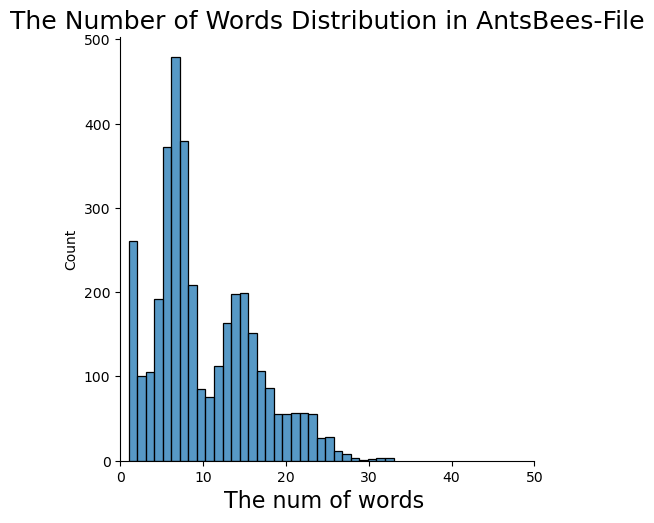

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize= (8, 8))

sns.displot(dataAntsBees['count'])

plt.xlim(0, 50)

plt.xlabel('The num of words ', fontsize = 16)
plt.title("The Number of Words Distribution in AntsBees-File", fontsize = 18)
plt.show()


In [20]:
MODEL_NAME = 'distilbert-base-uncased'
MAX_LEN = 500

sentenceAntsBees = antBeeText[0]

tkzr = DistilBertTokenizer.from_pretrained(MODEL_NAME)

inputs_antsBees = tkzr(sentenceAntsBees, max_length=MAX_LEN, truncation=True, padding=True)

print("For AntsBees:")
print(f'sentence: \'{sentenceAntsBees}\'')
print(f'input ids: {inputs_antsBees["input_ids"]}')
print(f'attention mask: {inputs_antsBees["attention_mask"]}')

tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

C:\Users\Aditya Jha\anaconda3\lib\site-packages\huggingface_hub\file_download.py:149: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Aditya Jha\.cache\huggingface\hub\models--distilbert-base-uncased. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

For AntsBees:
sentence: 'you should know assuming yeah welcome to Nobel week Stockholm yeah and all Nobel'
input ids: [101, 2017, 2323, 2113, 10262, 3398, 6160, 2000, 10501, 2733, 8947, 3398, 1998, 2035, 10501, 102]
attention mask: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


NameError: name 'tensorflow_dataset_antsBees' is not defined

In [22]:
def create_encodings(x, tkzr, max_len, trucation=True, padding=True):
    return tkzr(x, max_length=max_len, truncation=trucation, padding=padding)

In [23]:
def create_tensorflow_dataset(encodings, category=None):
    if category:
        return tf.data.Dataset.from_tensor_slices((dict(encodings),category))
    else:
        # this case is used when making predictions on unseen samples after training
        return tf.data.Dataset.from_tensor_slices(dict(encodings))

In [24]:
def create_encodings(x, tkzr, max_len, trucation=True, padding=True):
    return tkzr(x, max_length=max_len, truncation=trucation, padding=padding)

encodings_antsBees = create_encodings(antBeeText, tkzr, max_len=MAX_LEN)

In [27]:
TEST_SPLIT = 0.3
BATCH_SIZE = 25

train_size_antsBees = int(len(antBeeText) * (1-TEST_SPLIT))


tensorflow_dataset_antsBees = tensorflow_dataset_antsBees.shuffle(len(antBeeText))


tfdataset_train_antsBees = tensorflow_dataset_antsBees.take(train_size_antsBees)

tfdataset_test_antsBees = tensorflow_dataset_antsBees.skip(train_size_antsBees)


tfdataset_train_antsBees = tfdataset_train_antsBees.batch(BATCH_SIZE)
tfdataset_test_antsBees = tfdataset_test_antsBees.batch(BATCH_SIZE)

In [26]:
def create_tensorflow_dataset(encodings, category=None):
    if category:
        return tf.data.Dataset.from_tensor_slices((dict(encodings),category))
    else:
        # this case is used when making predictions on unseen samples after training
        return tf.data.Dataset.from_tensor_slices(dict(encodings))

tensorflow_dataset_antsBees = create_tensorflow_dataset(encodings_antsBees, antBeeCategory)

In [30]:
!pip install tensorflow_addons
#!pip install --upgrade tensorflow tensorflow-addons

#!pip install --upgrade tensorflow
#!pip install --upgrade keras

import tensorflow_addons as tfa
from tensorflow_addons.metrics import F1Score

N_EPOCHS = 2

model_antsBees = TFDistilBertForSequenceClassification.from_pretrained(MODEL_NAME)

optimizer = tf.keras.optimizers.legacy.Adam(learning_rate=3e-5)
loss = losses.SparseCategoricalCrossentropy(from_logits=True)
metrics = ['accuracy', F1Score(num_classes=3, average='micro')]

model_antsBees.compile(optimizer=optimizer, loss=loss, metrics=metrics)
model_antsBees.fit(tfdataset_train_antsBees, batch_size=BATCH_SIZE, epochs=N_EPOCHS)



model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFDistilBertForSequenceClassification: ['vocab_transform.weight', 'vocab_layer_norm.bias', 'vocab_layer_norm.weight', 'vocab_projector.bias', 'vocab_transform.bias']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFDistilBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['pre_classifier.weight', 'pre_classifier.bias', 'classifier.weight', 'classifier.bias']
You should 

Epoch 1/2


102/102 [==============================] - 213s 2s/step - loss: 0.3490 - accuracy: 0.8630 - f1_score: 0.5376
Epoch 2/2
102/102 [==============================] - 199s 2s/step - loss: 0.1738 - accuracy: 0.9368 - f1_score: 0.5330


In [31]:
benchmarks_antsBees = model_antsBees.evaluate(tfdataset_test_antsBees, return_dict=True, batch_size=BATCH_SIZE)


print(benchmarks_antsBees)


44/44 [==============================] - 28s 538ms/step - loss: 0.0994 - accuracy: 0.9698 - f1_score: 0.5378
{'loss': 0.09935446083545685, 'accuracy': 0.9698078632354736, 'f1_score': 0.5378435850143433}


In [34]:
def create_predictor(model, model_name, max_len):
  tkzr = DistilBertTokenizer.from_pretrained(model_name)
  def predict_proba(text):
      x = [text]

      encodings = create_encodings(x, tkzr, max_len=max_len)
      tfdataset = create_tensorflow_dataset(encodings)
      tfdataset = tfdataset.batch(1)

      preds = model.predict(tfdataset).logits
      preds = activations.softmax(tf.convert_to_tensor(preds)).numpy()
      return preds[0][1]

  return predict_proba

prediction_antBeeModel = create_predictor(model_antsBees, MODEL_NAME, MAX_LEN)


prediction_text = "Throughout my life, I've been fascinated by the intricate workings of the human body and the pursuit of understanding diseases and their treatments. From a young age, I've been drawn to biology and chemistry, eagerly devouring books and articles on topics ranging from genetics to pharmacology. My dream is to become a doctor and make a meaningful impact on the lives of others through the practice of medicine."

value_antBeeModel = prediction_antBeeModel(prediction_text)


print("AntBeeModel: " , value_antBeeModel)


antPercentage1 = round((1-value_antBeeModel)*100,2)
beePercentage1 = round(value_antBeeModel*100,2)

print("The MedLaw-Model predicts Lawyer with ", antPercentage1, "% and Medicine with ", beePercentage1, "%")

1/1 [==============================] - 0s 83ms/step
AntBeeModel:  0.97199404
The MedLaw-Model predicts Lawyer with  2.8 % and Medicine with  97.2 %
